In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv(r"dataset.csv")

col_names = {col: col.replace(" ", "_") for col in df.columns}
df.rename(col_names, axis=1, inplace=True)
df.head()

,graphic_card_type,communications,resolution_(px),CPU_cores,RAM_size,operating_system,drive_type,input_devices,multimedia,RAM_type,CPU_clock_speed_(GHz),CPU_model,state,drive_memory_size_(GB),warranty,screen_size,buynow_price
0,dedicated graphics,"['bluetooth', 'lan 10/100 mbps']",1920 x 1080,2,8 gb,['windows 10 home'],hdd,"['keyboard', 'touchpad']","['SD card reader', 'camera', 'microphone']",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2369.0
1,integrated graphics,"['bluetooth', 'lan 10/100/1000 mbps', 'lan 10/...",1920 x 1080,2,4 gb,['windows 10 home'],ssd,"['keyboard', 'touchpad']","['SD card reader', 'camera', 'microphone']",ddr4,2.0,intel core i3,new,240.0,producer warranty,"15"" - 15.9""",2299.0
2,dedicated graphics,"['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps']",1920 x 1080,4,16 gb,['windows 10 home'],ssd + hdd,"['keyboard', 'touchpad', 'illuminated keyboard...","['SD card reader', 'camera', 'speakers', 'micr...",ddr4,2.8,intel core i7,new,1500.0,producer warranty,"15"" - 15.9""",5999.0
3,integrated graphics,"['lan 10/100/1000 mbps', 'nfc (near field comm...",3200 x 1800,2,8 gb,['windows 10 home'],ssd,"['keyboard', 'touchpad']","['camera', 'speakers', 'microphone']",ddr3l,NaN,intel core i5,new,256.0,producer warranty,"13"" - 13.9""",3399.0
4,integrated graphics,"['wi-fi', 'bluetooth', 'lan 10/100 mbps']",1366 x 768,2,4 gb,['windows 10 home'],hdd,"['keyboard', 'touchpad', 'numeric keyboard']","['SD card reader', 'camera', 'speakers', 'micr...",ddr3,1.6,intel celeron dual-core,new,500.0,producer warranty,"15"" - 15.9""",1299.0


## Data Preparations

### Missing data

In [22]:
# % of missing data
round(df.isnull().sum() / len(df) * 100, 2)

graphic_card_type          6.32
communications             9.96
resolution_(px)            7.74
CPU_cores                  0.00
RAM_size                   5.73
operating_system           8.28
drive_type                 5.54
input_devices              8.63
multimedia                 9.02
RAM_type                  11.00
CPU_clock_speed_(GHz)     11.92
CPU_model                  6.79
state                      0.00
drive_memory_size_(GB)     6.13
warranty                   0.00
screen_size                4.41
buynow_price               0.00
dtype: float64

In [23]:
# detailed info about non numeric columns
for col in df.select_dtypes(include="object").columns:
	print(df[col].value_counts(dropna=False))
	print("----------------------")

graphic_card_type
dedicated graphics     4328
integrated graphics    3029
NaN                     496
Name: count, dtype: int64
----------------------
communications
['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps']                                                                                                    1864
['bluetooth', 'lan 10/100 mbps']                                                                                                                  1080
NaN                                                                                                                                                782
['bluetooth', 'lan 10/100/1000 mbps', 'lan 10/100 mbps', 'intel wireless display (widi)', 'nfc (near field communication)', 'modem 3g (wwan)']     740
['bluetooth', 'lan 10/100/1000 mbps']                                                                                                              610
                                                                               

In [24]:
# remove columns with Nulls
df.drop("state", axis=1, inplace=True)
df.dropna(inplace=True)

## Outliers and large values

In [25]:
df.describe()

,CPU_clock_speed_(GHz),drive_memory_size_(GB),buynow_price
count,6109.000000,6109.000000,6109.000000
mean,2.350604,670.683909,3569.637144
std,0.377795,490.247390,1672.614207
min,0.000000,32.000000,429.000000
25%,2.100000,256.000000,2309.000000
50%,2.500000,500.000000,3269.000000
75%,2.600000,1000.000000,4499.000000
max,3.900000,10000.000000,15472.650000


c:\Users\gnoev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


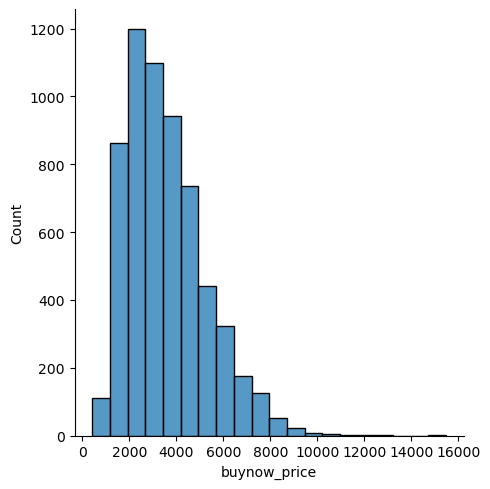

In [26]:
# prices distributions
sns.displot(df["buynow_price"], bins=20);

**Decision**: Remve record with large prices due to the small number of such records, which could influence the prediction model and negatively affect the accuracy and stability of the target variable predictions.

In [27]:
df = df[(df["buynow_price"] <= 10000) & (df["drive_memory_size_(GB)"] < 3000)]
df["id"] = range(len(df))

## Feature Engineering

In [28]:
# convert column type to numeric
df["RAM_size"] = df["RAM_size"].str[:-3].astype(int)

In [29]:
# Creating dummy variables for categorical columns
list_cols = ["communications", "operating_system", "input_devices", "multimedia"]
complex_cols = df[list_cols]

dummy_vars = [col for col in df.select_dtypes(include="object").columns if col not in list_cols]
df = pd.get_dummies(df.drop(list_cols, axis=1), columns=dummy_vars, dtype=int, drop_first=True).reset_index(drop=True)
df.head()

,RAM_size,CPU_clock_speed_(GHz),drive_memory_size_(GB),buynow_price,id,graphic_card_type_integrated graphics,resolution_(px)_1366 x 768,resolution_(px)_1600 x 900,resolution_(px)_1920 x 1080,resolution_(px)_1920 x 1200,...,CPU_model_intel core m,CPU_model_intel pentium dual-core,CPU_model_intel pentium quad-core,CPU_model_other CPU,warranty_seller warranty,"screen_size_12"" - 12.9""","screen_size_13"" - 13.9""","screen_size_14"" - 14.9""","screen_size_15"" - 15.9""","screen_size_17"" - 17.9"""
0,8,2.0,1000.0,2369.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,4,2.0,240.0,2299.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,16,2.8,1500.0,5999.0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1.6,500.0,1299.0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,2.4,500.0,3329.0,4,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Below a simple algorithm to convert list column into dummy variables and append it to data frame

In [30]:
complex_cols.head()

,communications,operating_system,input_devices,multimedia
0,"['bluetooth', 'lan 10/100 mbps']",['windows 10 home'],"['keyboard', 'touchpad']","['SD card reader', 'camera', 'microphone']"
1,"['bluetooth', 'lan 10/100/1000 mbps', 'lan 10/...",['windows 10 home'],"['keyboard', 'touchpad']","['SD card reader', 'camera', 'microphone']"
2,"['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps']",['windows 10 home'],"['keyboard', 'touchpad', 'illuminated keyboard...","['SD card reader', 'camera', 'speakers', 'micr..."
4,"['wi-fi', 'bluetooth', 'lan 10/100 mbps']",['windows 10 home'],"['keyboard', 'touchpad', 'numeric keyboard']","['SD card reader', 'camera', 'speakers', 'micr..."
5,"['wi-fi', 'bluetooth', 'lan 10/100 mbps', 'mod...","['windows 7 professional 64-bit', 'windows 10 ...","['keyboard', 'touchpad', 'illuminated keyboard']","['camera', 'speakers', 'microphone']"


In [31]:
for col in complex_cols.columns:
	values = pd.DataFrame(complex_cols[col].str[1:-1].str.split(",").to_list())
	pivoted_values = pd.concat([df["id"], values], axis=1).melt(id_vars="id", value_name=col).drop("variable", axis=1)

	pivoted_values[col] = pivoted_values[col].str.strip().str[1:-1]
	pivoted_values = pivoted_values.dropna().drop_duplicates().sort_values("id")

	dummy_variables = pd.get_dummies(pivoted_values, dtype=int, drop_first=True).drop_duplicates()
	dummy_variables = dummy_variables.groupby("id").max().reset_index()

	df = df.merge(dummy_variables, how="left", on="id")

df.head()

,RAM_size,CPU_clock_speed_(GHz),drive_memory_size_(GB),buynow_price,id,graphic_card_type_integrated graphics,resolution_(px)_1366 x 768,resolution_(px)_1600 x 900,resolution_(px)_1920 x 1080,resolution_(px)_1920 x 1200,...,operating_system_windows 8.1 home 32-bit,operating_system_windows 8.1 home 64-bit,operating_system_windows 8.1 professional 32-bit,operating_system_windows 8.1 professional 64-bit,input_devices_keyboard,input_devices_numeric keyboard,input_devices_touchpad,multimedia_camera,multimedia_microphone,multimedia_speakers
0,8,2.0,1000.0,2369.0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,1,0
1,4,2.0,240.0,2299.0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,1,1,0
2,16,2.8,1500.0,5999.0,2,0,0,0,1,0,...,0,0,0,0,1,1,1,1,1,1
3,4,1.6,500.0,1299.0,3,1,1,0,0,0,...,0,0,0,0,1,1,1,1,1,1
4,4,2.4,500.0,3329.0,4,1,1,0,0,0,...,0,0,0,0,1,0,1,1,1,1


### Export dataset for modelling

In [32]:
df.to_csv("prepared_dataset.csv", index=False)